# __Food & Beverages__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Food & Beverages is divided into _three_ subcategories: 

# __1. Cafe:__

In [3]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Food & Beverages/cafe refresh.csv")
df.head()

,text,sentiment
0,A lot of folks on twitter already spoke about ...,Positive
1,bangalore airport ninchi baitaki raagane micr...,Neutral
2,if you have an early morning flight to catch ...,Positive
3,do check out mitti cafe if you are around the ...,Neutral
4,be a part of history in the making today when ...,Neutral


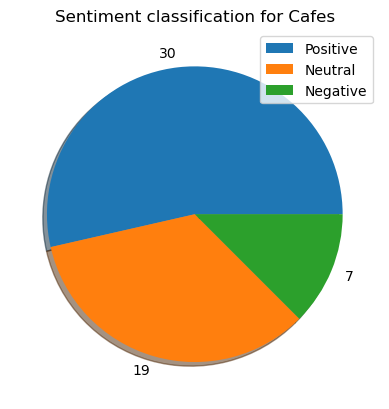

In [4]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
cafe_count = val.values

#Plotting a pie chart
plt.pie(cafe_count, labels = cafe_count, shadow= True)
plt.title("Sentiment classification for Cafes")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding cafes:

### Topic Modelling

In [5]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['text'].tolist()

#Creating custom stop words
custom = ["location","auspicious","attached","night","folks","screenshot","whatever","audacious","rahul","dravid","photo","tart","tamarind","social","boundaries"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: cafe, just, windmills, want, bengaluru, time, outside, really, feel, lounge
Topic 2: coffee, ve, zone, smoking, smoke, best, lounge, outside, cafes, cafe
Topic 3: cafe, inside, adorable, day, try, morning, definitely, beautiful, bengaluru, life
Topic 4: cafe, life, like, just, beautiful, good, need, coffee, try, morning
Topic 5: cafe, life, like, just, beautiful, good, need, coffee, try, morning
Topic 6: cafe, request, breakfast, good, life, place, want, definitely, noir, time
Topic 7: cafe, coffee, day, noir, sparrows, way, need, inside, good, breakfast
Topic 8: cafe, life, like, just, beautiful, good, need, coffee, try, morning
Topic 9: restaurants, cafes, just, place, outside, really, feel, area, cafe, life
Topic 10: cafes, just, good, area, awesome, like, beautiful, need, try, morning


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

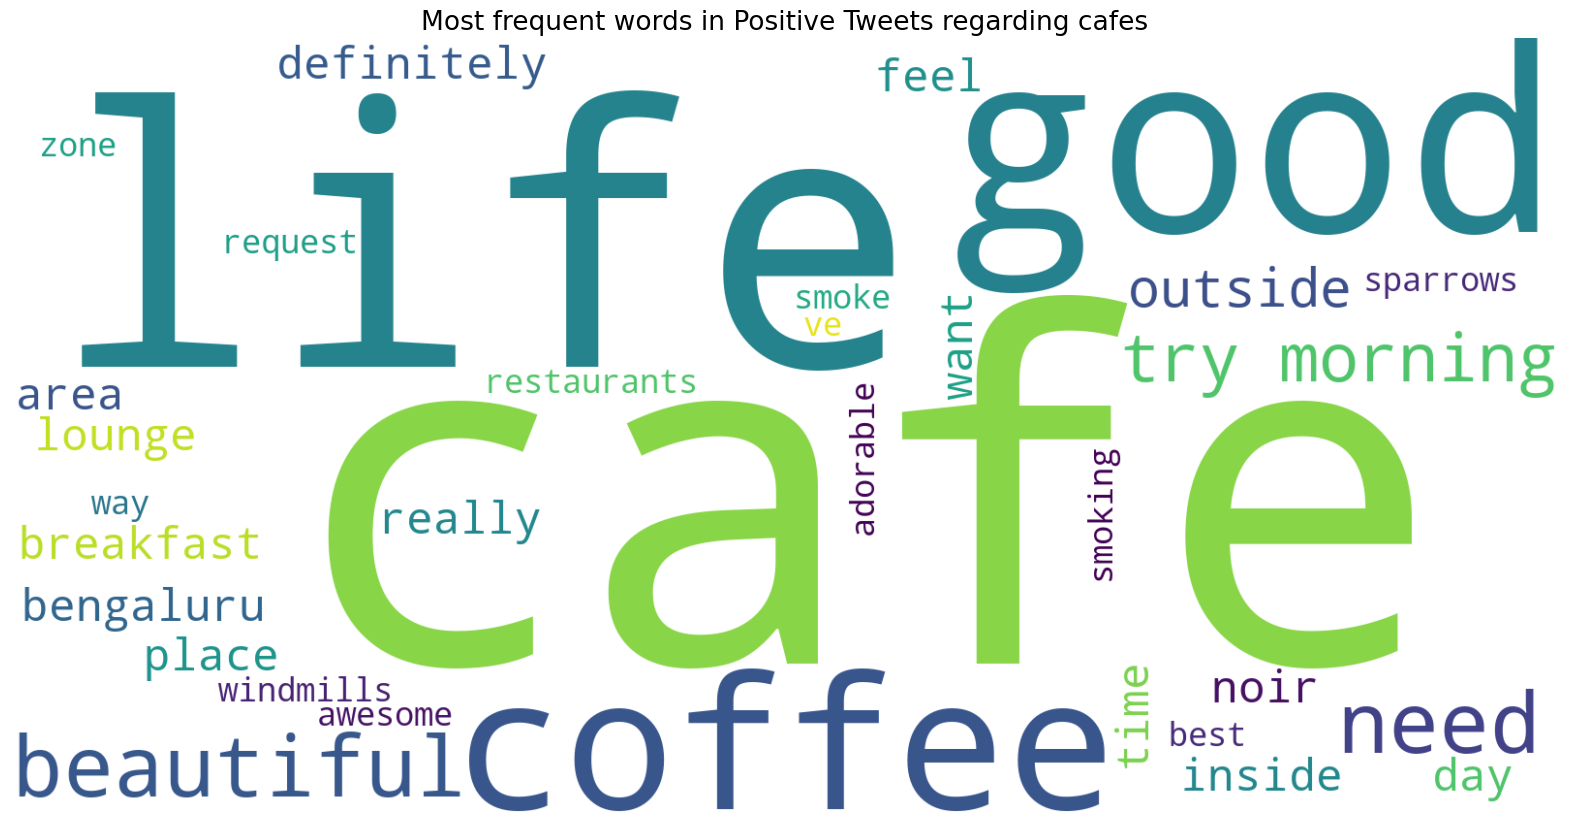

In [6]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding cafes', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding cafes
#### 1. People visiting cafes at Bengaluru airport praise the picturesque sceneries.
#### 2. Coffee at Malgudi cafe is claimed to be the best
#### 3. Sparrows in the open area cafes bring people closer to nature and peace

## b.Topic modelling and wordcloud for negative tweets regarding cafes:

### Topic Modelling

In [7]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['text'].tolist()

#Creating custom stop words
custom = []
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 1,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 5
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 7
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: celebrity, pictures, people, does, place, wearebangalore, mobiles
Topic 2: alu, watch, fork, knife, man, torture, struggling
Topic 3: hate, day, coffee, sitting, hours, waiting, wait
Topic 4: mumbai, ve, idea, ghadazien, raja, french, ll
Topic 5: seat, people, wtf, kind, reserved, tissue, guy


### Word Cloud

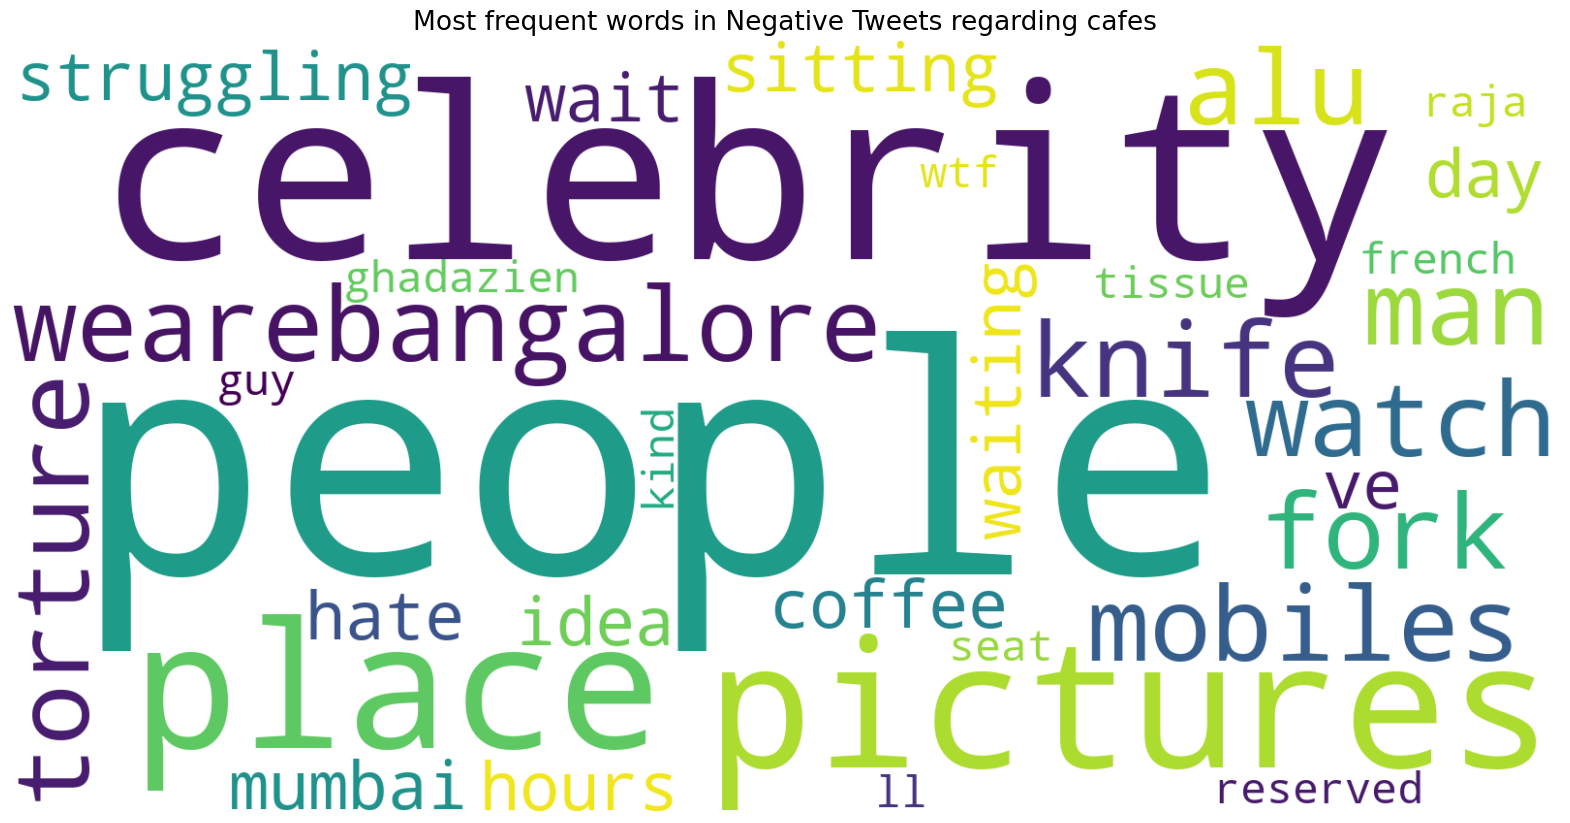

In [8]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding cafes', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding cafes
#### 1. People have complained about Cafe Coffee Day being expensive and not worth the money
#### 2. While some people love the sparrows flocking around the cafes, some others see it as a nuisance due to food theft and other disripancies
#### 3. Complains regarding staff behaviour are prevalent
#### 4. Travellers have also complained about misconduct of some sports' teams in cafes